Data Analyzed- vehicle_waypoint_2.csv


data 20- taken till 1500 data point due to noise

In [35]:
import numpy as np

In [36]:
import pandas as pd

input_file='/content/vehicle_waypoint_6.csv'
output_file='/content/generated_states_6.csv'

data=pd.read_csv(input_file)

data.iloc[:, 1]

0      -0.390551
1      -0.390694
2      -0.391132
3      -0.390688
4      -0.391122
          ...   
2615   -0.479333
2616   -0.479899
2617   -0.479110
2618   -0.479663
2619   -0.479671
Name: Y, Length: 2620, dtype: float64

In [37]:
data

,X,Y,Roll,Pitch,Yaw
0,1.407152,-0.390551,97.981850,19.606005,-104.575285
1,1.407178,-0.390694,97.906155,19.219516,-104.576405
2,1.407608,-0.391132,97.875156,19.249013,-104.594376
3,1.407216,-0.390688,97.897662,18.871781,-104.488185
4,1.407629,-0.391122,97.868247,18.899461,-104.504978
...,...,...,...,...,...
2615,1.411367,-0.479333,125.252985,15.415691,-105.998938
2616,1.411977,-0.479899,125.223404,15.443321,-106.014495
2617,1.411091,-0.479110,125.262761,15.408373,-106.000203
2618,1.411691,-0.479663,125.233223,15.435232,-106.015424


In [38]:
data.iloc[1]

X          1.407178
Y         -0.390694
Roll      97.906155
Pitch     19.219516
Yaw     -104.576405
Name: 1, dtype: float64

In [39]:
data.iloc[2]

X          1.407608
Y         -0.391132
Roll      97.875156
Pitch     19.249013
Yaw     -104.594376
Name: 2, dtype: float64

In [40]:
action_input_file='/content/6.csv'
action_output_file='/content/calculated_state_6.csv'

action=pd.read_csv(action_input_file)

In [64]:
action

,velocity,omega
0,0.004554,0.060643
1,0.005689,-0.054076
2,0.005689,0.378374
3,0.005689,-0.366683
4,0.002480,-0.013650
...,...,...
2708,0.000891,0.070636
2709,0.001354,-0.014892
2710,0.000319,0.021643
2711,0.000039,0.068762


In [42]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
heading = data.iloc[:, 4]

In [43]:
x[0]

1.407152

In [44]:
states=[]

In [45]:
v = action.iloc[:, 0]
w = action.iloc[:, 0]

In [46]:
np.max(v)

0.0079999992499998

In [47]:
curr_state = [x[0], y[0], heading[0]]
print(curr_state)
states.append(curr_state)

[1.407152, -0.390551, -104.57528458428877]


In [48]:
states[-1][2] + w[0]

-104.57073011999535

In [49]:
import math

In [51]:
for i in range(len(action)):
  curr_heading = states[-1][2] + w[i]
  curr_x = states[-1][0] + v[i]* np.cos(w[i]* (math.pi / 180))
  curr_y = states[-1][1] + v[i]* np.sin(w[i]* (math.pi / 180))
  curr_generated_state = [curr_x, curr_y, curr_heading]
  states.append(curr_generated_state)


In [52]:
states

[[1.407152, -0.390551, -104.57528458428877],
 [1.4117064642790265, -0.3905506379638229, -104.57073011999535],
 [1.4173953943593414, -0.3905500731067601, -104.56504118988698],
 [1.4230843244396565, -0.3905495082496973, -104.55935225977862],
 [1.4287732545199714, -0.3905489433926345, -104.55366332967026],
 [1.4312533746760272, -0.39054883603750207, -104.55118320951188],
 [1.4378601620511144, -0.39054807420756843, -104.54457642209286],
 [1.442219948386469, -0.39054774245997476, -104.54021663574488],
 [1.4435901958089905, -0.3905477096900567, -104.53884638832197],
 [1.448862297834242, -0.3905472245747446, -104.5335742862744],
 [1.449851807308531, -0.39054720748571975, -104.53258477679996],
 [1.4525964867037813, -0.39054707600544214, -104.52984009740156],
 [1.4541695124499578, -0.3905470328188406, -104.5282670716548],
 [1.4549658402718237, -0.3905470217510446, -104.52747074383285],
 [1.457013128476901, -0.3905469485975063, -104.52542345562647],
 [1.4577940516484658, -0.390546937953773, -104

In [63]:
x_generated = [row[0] for row in states]
y_generated = [row[1] for row in states]
heading_generated = [row[2] for row in states]
print(max(x_generated))
print(max(y_generated))

13.301217536900118
-0.3893917114280518


In [55]:
df = pd.DataFrame({'X': x_generated, 'Y': y_generated, 'Yaw': heading_generated})

# Define the file path
file_path = output_file  # Change the file extension as needed (e.g., '.csv', '.txt')

# Write the DataFrame to a file with headers and separated by commas (CSV format)
df.to_csv(file_path, index=False)

In [21]:
df = pd.DataFrame({'x': x_generated, 'y': y_generated})
df

,x,y
0,1.407152,-0.390551
1,1.411706,-0.390551
2,1.417395,-0.390550
3,1.423084,-0.390550
4,1.428773,-0.390549
...,...,...
2709,13.298166,-0.389392
2710,13.299520,-0.389392
2711,13.299839,-0.389392
2712,13.299878,-0.389392


<Axes: xlabel='x', ylabel='y'>

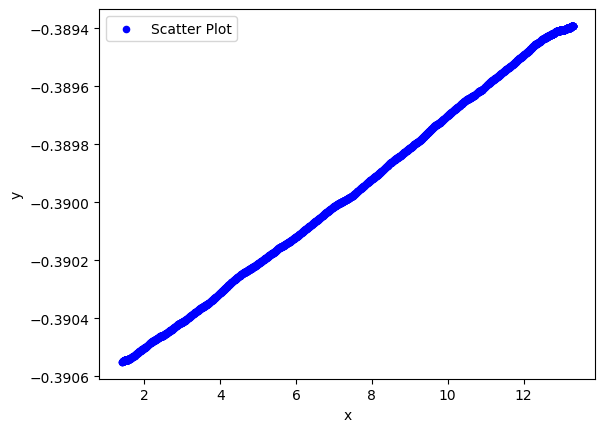

In [22]:
df.plot.scatter(x='x', y='y', c='blue', label='Scatter Plot')

Conclusion: origin is where the headphone was kept during data collection

<Axes: xlabel='X', ylabel='Y'>

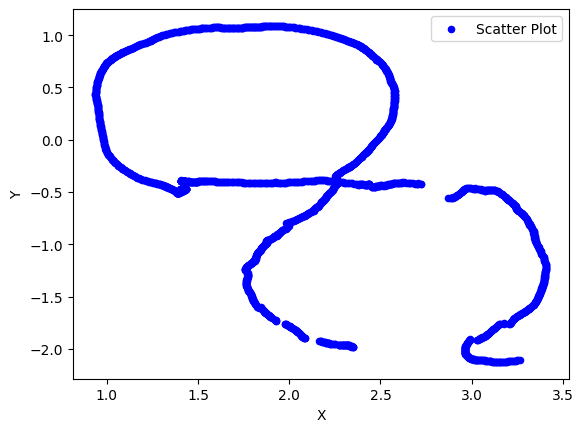

In [60]:
data.plot.scatter(x='X', y='Y', c='blue', label='Scatter Plot')